In [32]:
# Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit and
# make a table containing R^2 value for each prepared model

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np  


In [34]:
df = pd.read_csv("50_Startups.csv")
df.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [36]:
#check for missing values
df.isna().sum() 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [37]:
# correlation
df.corr() 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [38]:
# scatter plot
sns.set_style(style='darkgrid')
sns.pairplot(df)  

In [39]:
# RENAMING DATA SET

In [40]:
df1=df.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'},axis=1)
df1.head() 

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# MODEL BUILDING  

In [42]:
model=smf.ols("Profit~RD+AD+MS",data=df1).fit()  

In [43]:
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        12:11:14   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# r square value = 0.951
# p values of  AD & MS > 0.05 , SO THEY ARE INSIGNIFICANT 
# WILL BUILD A MODEL WITH THEM SEPERATELY TO REMOVE Insignificant variable 

In [45]:
modela=smf.ols("Profit~AD",data=df1).fit() 

In [46]:
modela.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 02 Feb 2023   Prob (F-statistic):              0.162
Time:                        12:11:15   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
AD             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
 # AD  is  IN-significant  as p value is > 0.05

In [48]:
modelms=smf.ols("Profit~MS",data=df1).fit() 

In [49]:
modelms.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        12:11:15   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
modelms.pvalues 

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

In [51]:
# MS is  significant  as p value is < 0.05

In [52]:

 # AD  is  IN-significant 
# MS is  significant  


In [79]:
modelt=smf.ols("Profit~RD+MS",data=df1).fit()  

In [80]:
modelt.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           2.16e-31
Time:                        12:50:15   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#  r square value is reduced when AD is removed so its signidicant 

In [54]:
# both are significant 

In [81]:
modelf=smf.ols("Profit~AD+MS",data=df1).fit()  

In [82]:
modelf.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           2.50e-10
Time:                        12:56:53   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
AD             0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# when we are building model with both AD , MS they are significant 

# model validation 
# calculating vif values ( Collinearity Check) 

In [56]:
r=smf.ols("RD~AD+MS",data=df1).fit().rsquared
vif_r=1/(1-r)

a=smf.ols("AD~RD+MS",data=df1).fit().rsquared
vif_a=1/(1-a)

m=smf.ols("MS~RD+AD",data=df1).fit().rsquared
vif_m=1/(1-m)

# Putting the values in Dataframe format
d1={'Variables':['RD','AD','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df 

,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


In [57]:
# all vif values < 20 ,  so consider all varaibles in Regression equation

# 2) Residual Analysis 

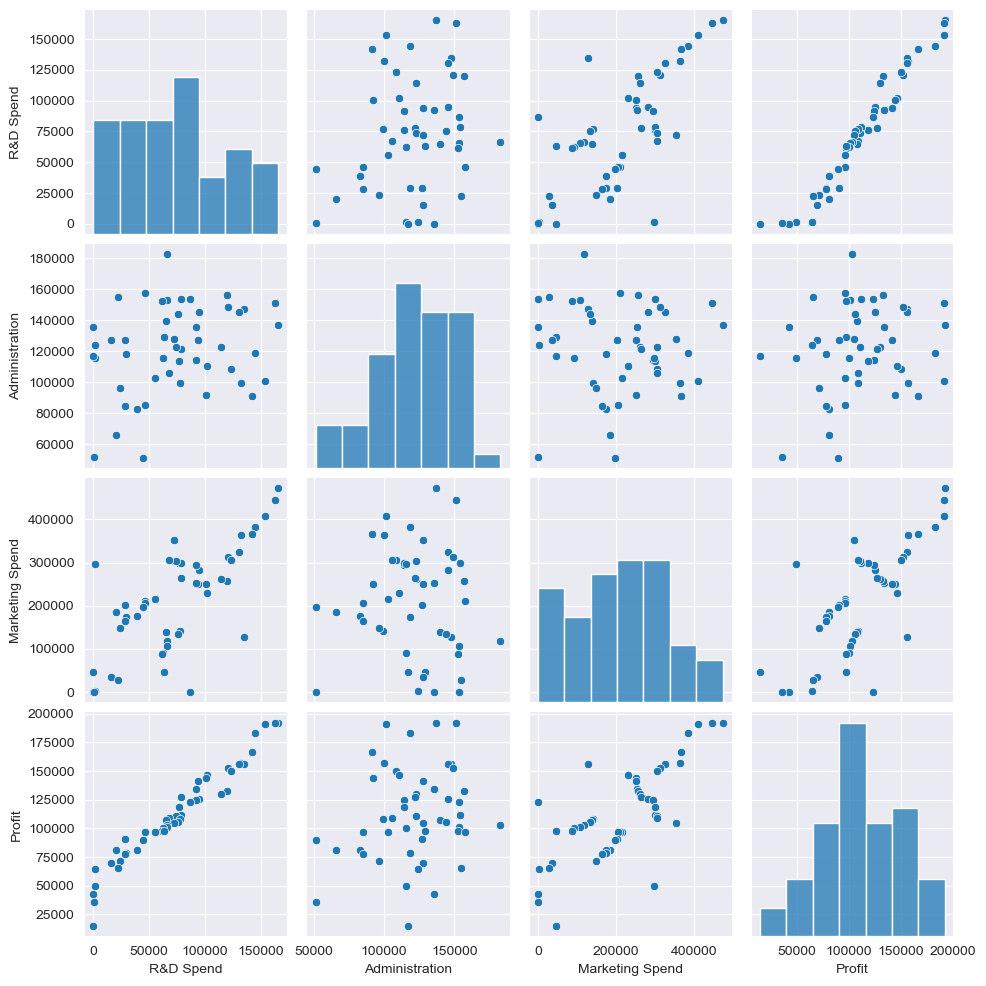

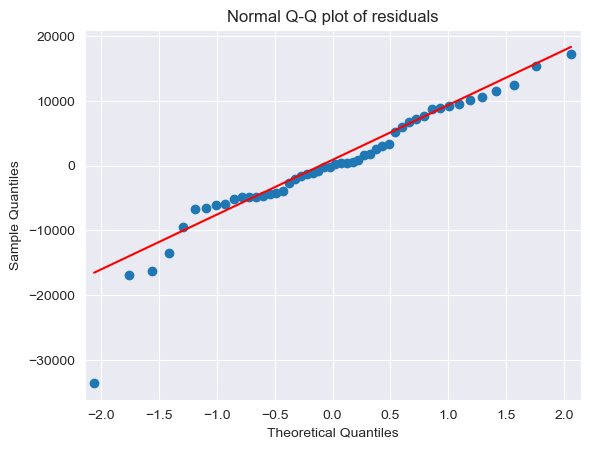

In [58]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show() 





In [59]:
list(np.where(model.resid<-30000)) 

[array([49], dtype=int64)]

In [60]:
 #Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)


In [61]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma 

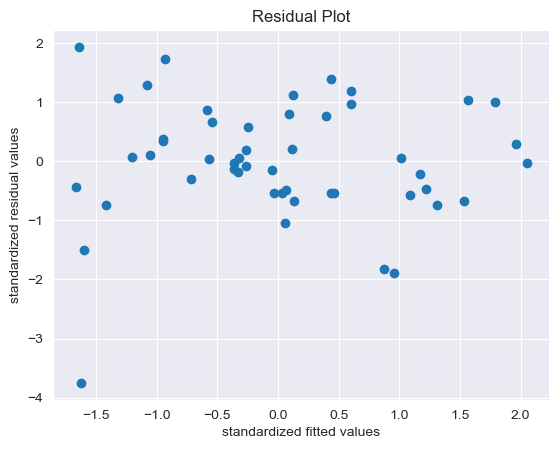

In [62]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()  

In [63]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


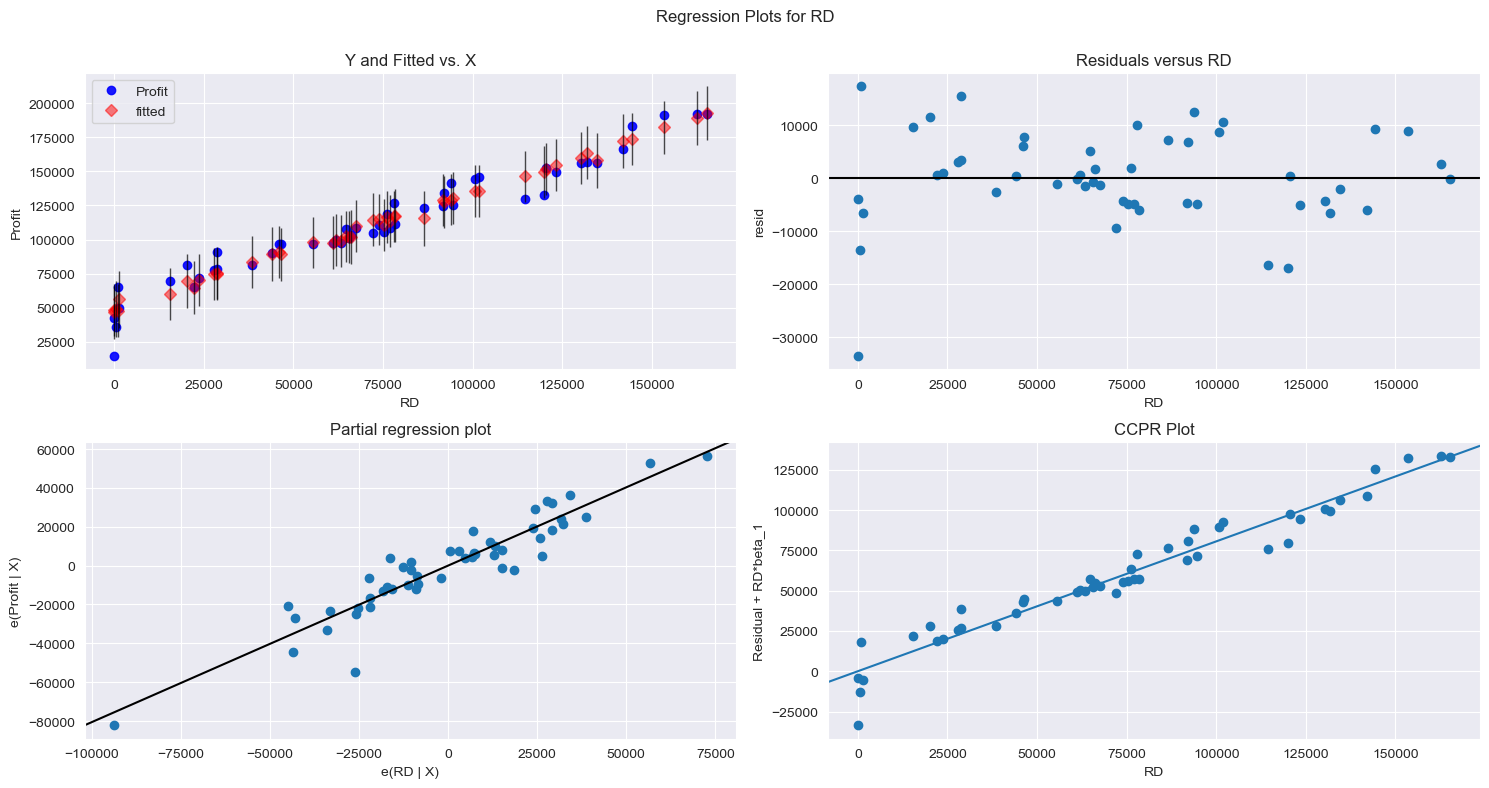

In [64]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show() 

eval_env: 1


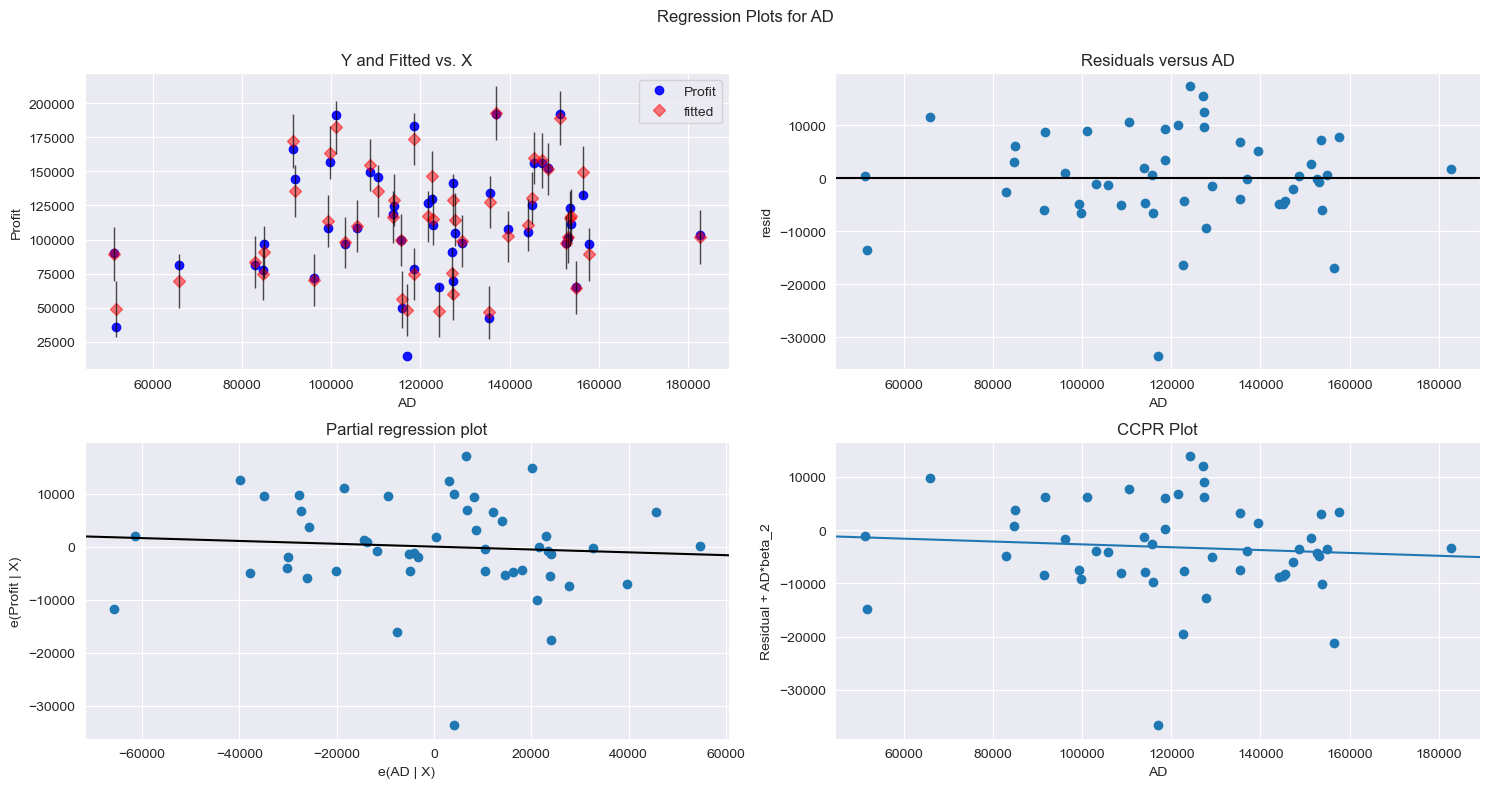

In [65]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show() 

eval_env: 1


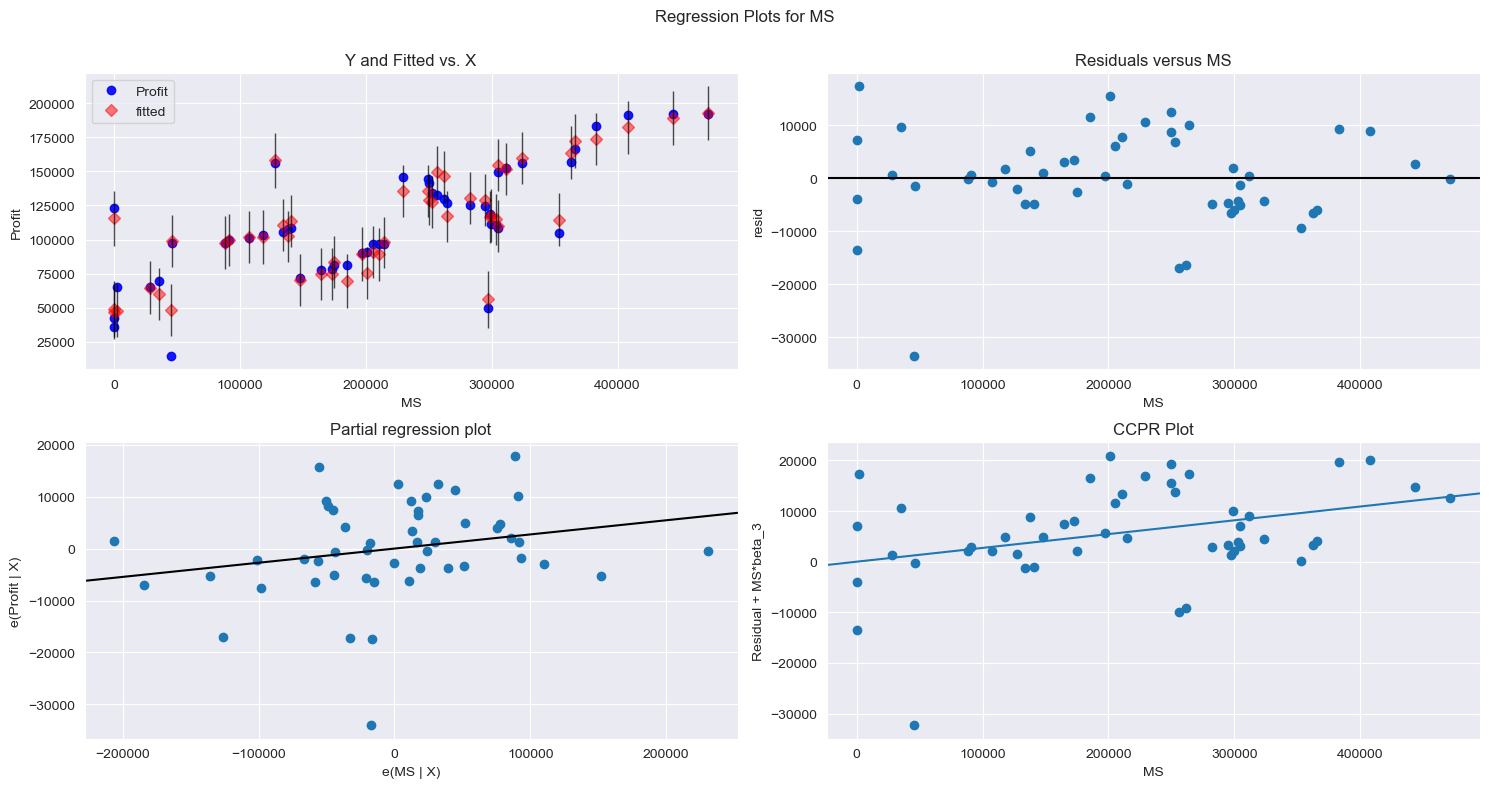

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show() 

# Model Deletion Diagnostics (checking Outliers ) 

In [67]:
 # Cook's Distance  
# Leverage value 

In [68]:
# Cook's Distance: If Cook's distance > 1, then it's an outlier 

In [69]:
(c,_)=model.get_influence().cooks_distance
c 

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

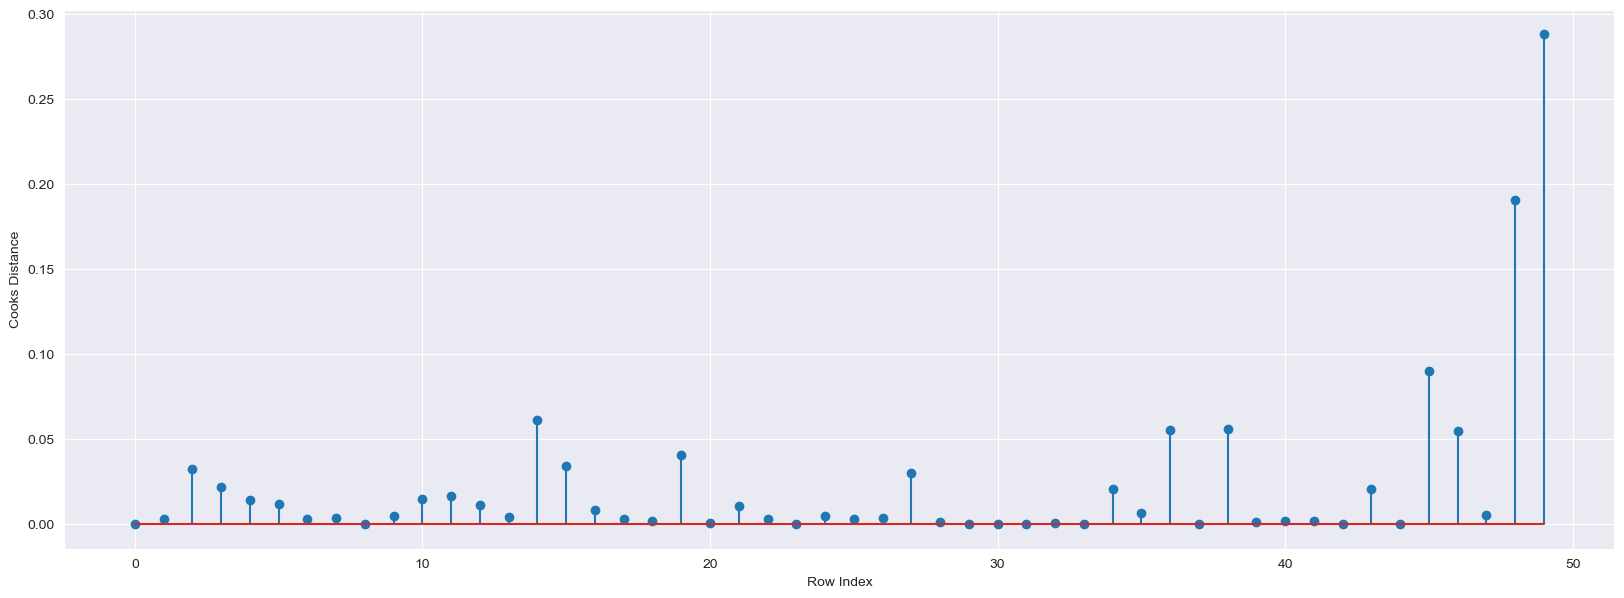

In [70]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show() 

In [71]:
np.argmax(c) , np.max(c) 


(49, 0.28808229275432634)

In [ ]:
# since cooks distance is < 1 ..
# so no outliers 
# no need to remove any rows 

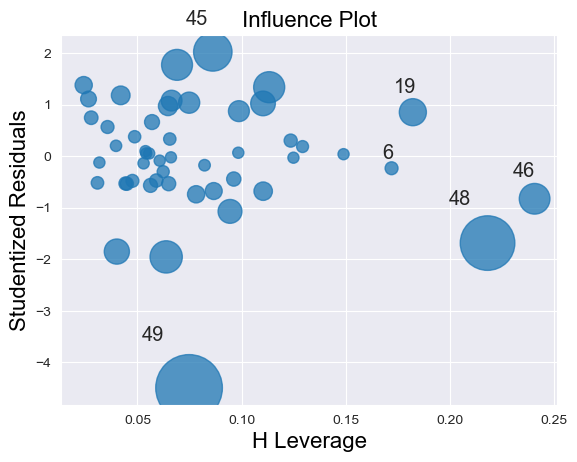

In [72]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show() 

In [83]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff  

0.36

In [ ]:
# all values are below cutoff value ... so no outliers 

In [ ]:
# the final model is 

In [84]:
model_f=smf.ols("Profit~RD+AD+MS",data=df1).fit()  

# predit 

In [89]:
df2=pd.DataFrame({'RD':15300,"AD":914015,"MS":301548},index=[0])
df2 

,RD,AD,MS
0,15300,914015,301548


In [90]:
model_f.predict(df2) 

0    46150.004386
dtype: float64

In [91]:
# predict for whole data set

In [94]:
pred=model_f.predict(df1)
pred  

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
